# 3. Scaling Features in the Wine Quality Dataset

Importing the libraries

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

Importing the datasets

In [15]:
wine_df = pd.read_csv('./datasets/wine_quality.csv')

In [16]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Separate features and target

In [17]:
features = wine_df.drop(columns=['quality'])
target = wine_df['quality']

Applying Normalization

In [18]:
min_max_scaler = MinMaxScaler()
features_normalized = min_max_scaler.fit_transform(features)
features_normalized_df = pd.DataFrame(features_normalized, columns=features.columns)

Applying Standardization

In [19]:
standard_scaler = StandardScaler()
features_standardized = standard_scaler.fit_transform(features)
features_standardized_df = pd.DataFrame(features_standardized, columns=features.columns)

Display statistical summaries

In [20]:
print("Statistical Summary of Original Features:\n", features.describe())
print("\nStatistical Summary of Normalized Features:\n", features_normalized_df.describe())
print("\nStatistical Summary of Standardized Features:\n", features_standardized_df.describe())

Statistical Summary of Original Features:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min  

Plotting the distributions

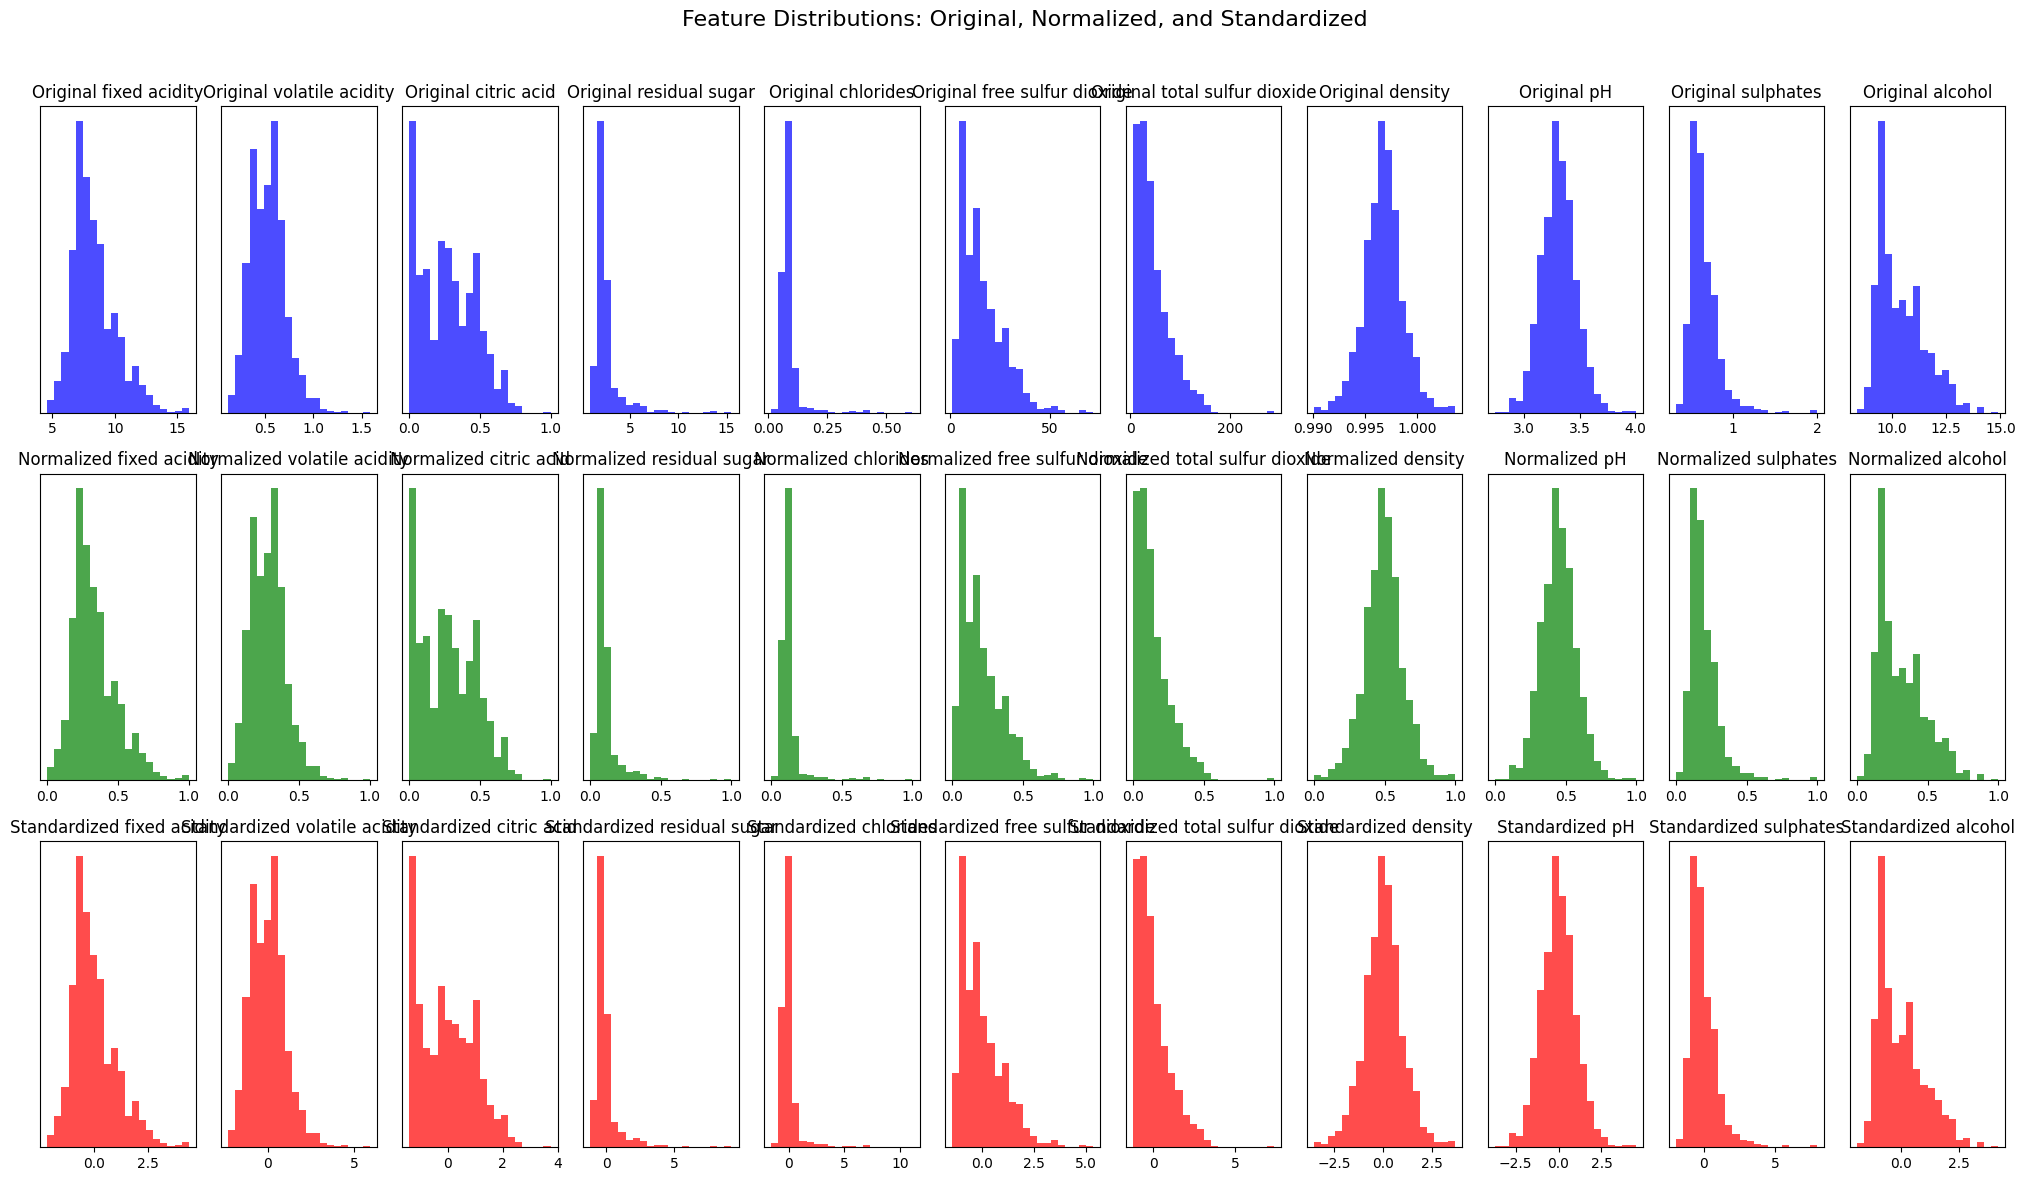

In [21]:
fig, axs = plt.subplots(3, len(features.columns), figsize=(20, 12))
fig.suptitle('Feature Distributions: Original, Normalized, and Standardized', fontsize=16)

# original features
for i, col in enumerate(features.columns):
    axs[0, i].hist(features[col], bins=20, color='blue', alpha=0.7)
    axs[0, i].set_title(f'Original {col}')
    axs[0, i].set_yticks([])

# normalized features
for i, col in enumerate(features.columns):
    axs[1, i].hist(features_normalized_df[col], bins=20, color='green', alpha=0.7)
    axs[1, i].set_title(f'Normalized {col}')
    axs[1, i].set_yticks([])

# standardized features
for i, col in enumerate(features.columns):
    axs[2, i].hist(features_standardized_df[col], bins=20, color='red', alpha=0.7)
    axs[2, i].set_title(f'Standardized {col}')
    axs[2, i].set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()